# Lab 3

* The lab today will be focused on metrics using the confusion matrix values.

In [18]:
# All imports necessary
import pandas as pd
from sklearn.metrics import *
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Importing the csv
df = pd.read_csv('Heart Attack.csv')

In [19]:
df.head(10)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
5,58,0,61,112,58,87.0,1.83,0.004,negative
6,32,0,40,179,68,102.0,0.71,0.003,negative
7,63,1,60,214,82,87.0,300.00,2.370,positive
8,44,0,60,154,81,135.0,2.35,0.004,negative
9,67,1,61,160,95,100.0,2.84,0.011,negative


In [20]:
# Description of the csv file using describe() function
print(df.describe())
print(df.info())


               age       gender      impluse  pressurehight  pressurelow  \
count  1319.000000  1319.000000  1319.000000    1319.000000  1319.000000   
mean     56.191812     0.659591    78.336619     127.170584    72.269143   
std      13.647315     0.474027    51.630270      26.122720    14.033924   
min      14.000000     0.000000    20.000000      42.000000    38.000000   
25%      47.000000     0.000000    64.000000     110.000000    62.000000   
50%      58.000000     1.000000    74.000000     124.000000    72.000000   
75%      65.000000     1.000000    85.000000     143.000000    81.000000   
max     103.000000     1.000000  1111.000000     223.000000   154.000000   

           glucose          kcm     troponin  
count  1319.000000  1319.000000  1319.000000  
mean    146.634344    15.274306     0.360942  
std      74.923045    46.327083     1.154568  
min      35.000000     0.321000     0.001000  
25%      98.000000     1.655000     0.006000  
50%     116.000000     2.850000  

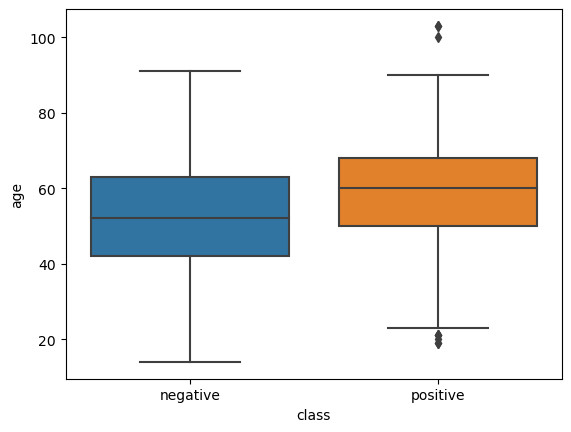

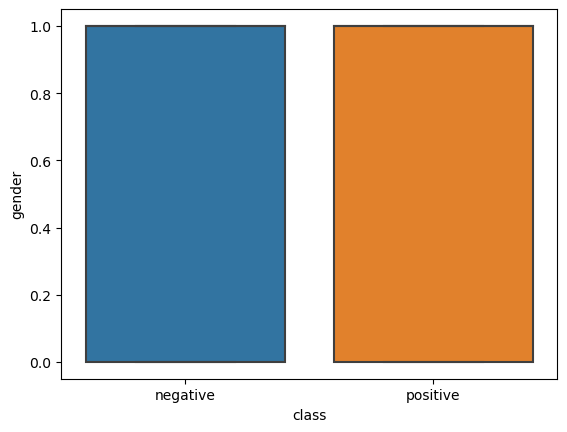

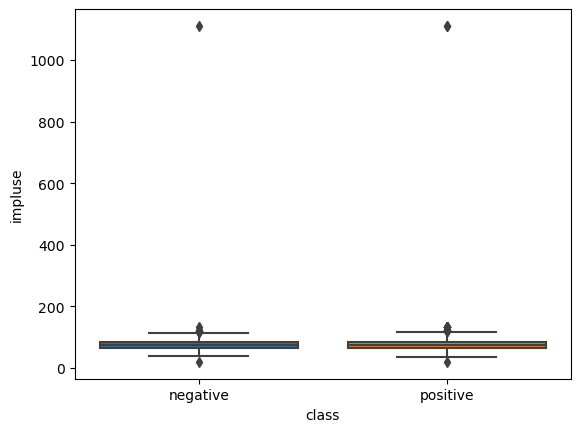

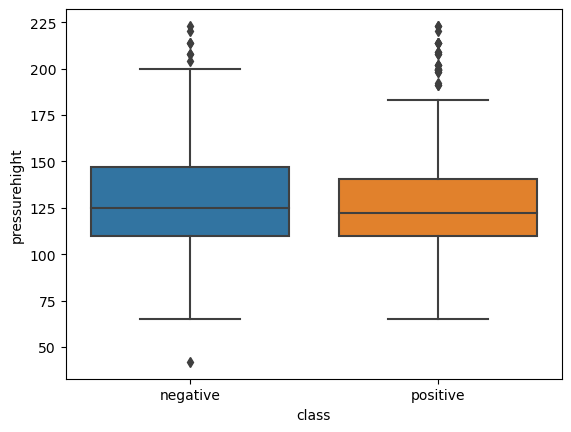

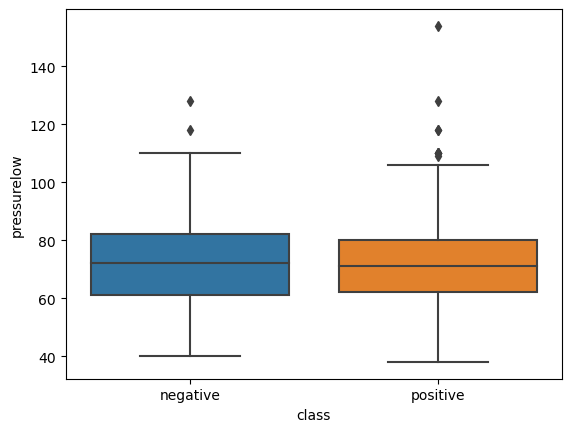

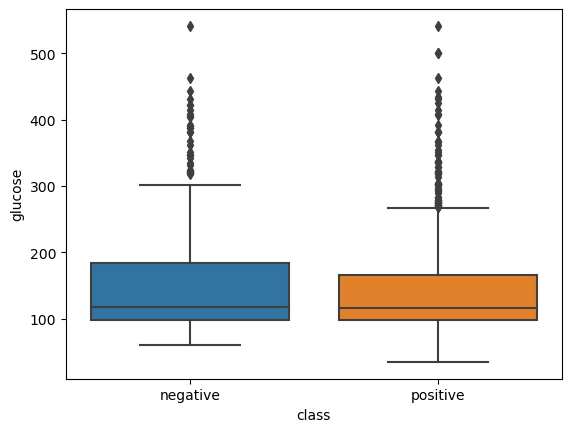

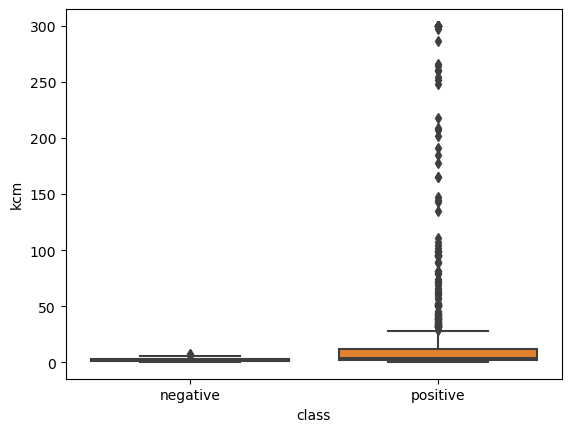

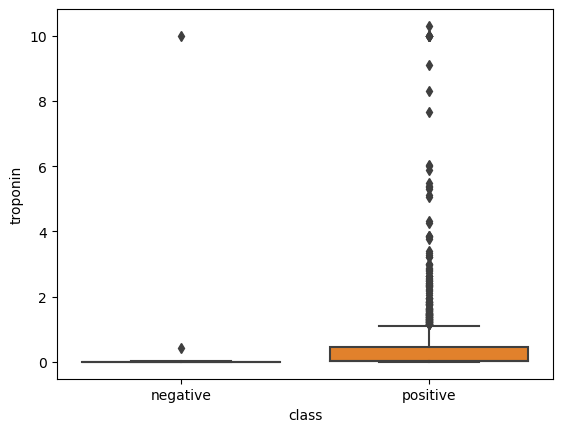

In [21]:
# SNS boxplot function on the data for each attribute except 'class' in df
for column in df:
    if column != 'class':
        sns.boxplot(x='class', y=column, data=df)
        plt.show()

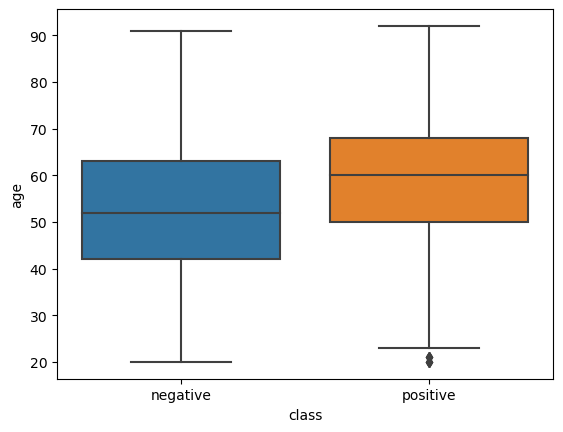

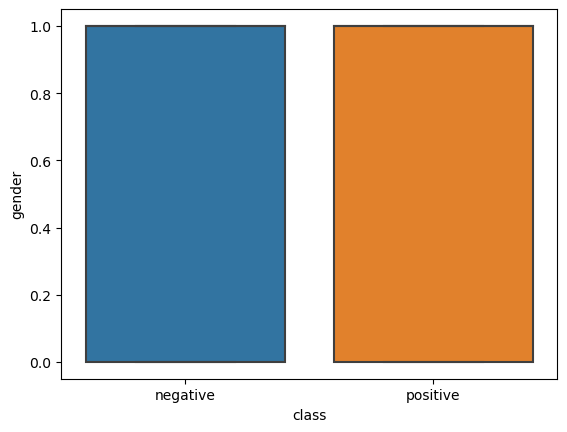

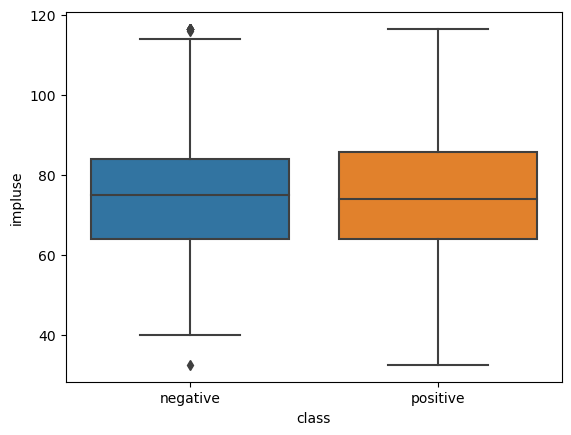

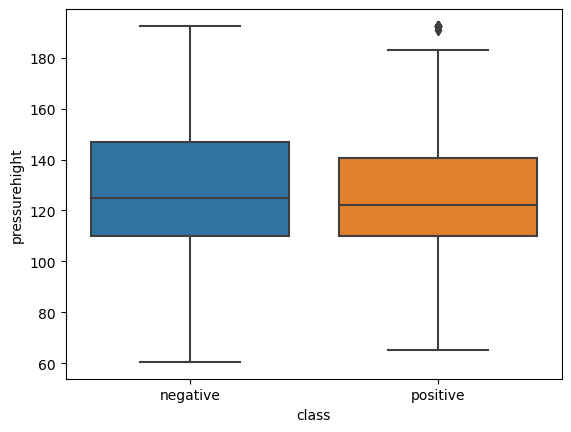

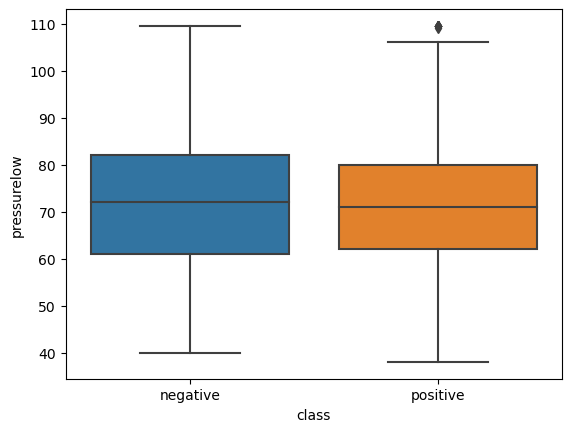

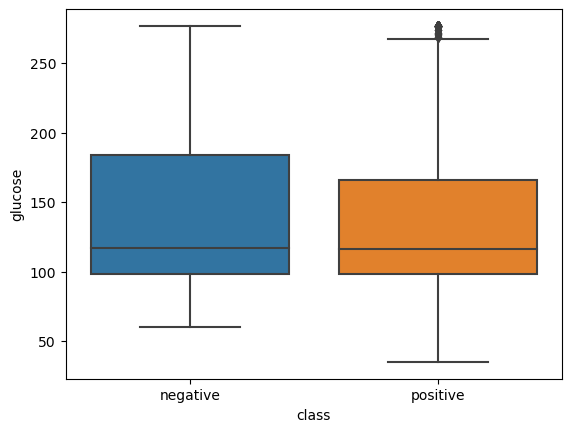

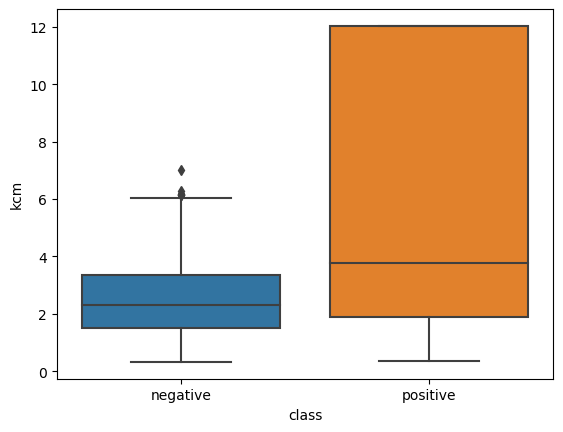

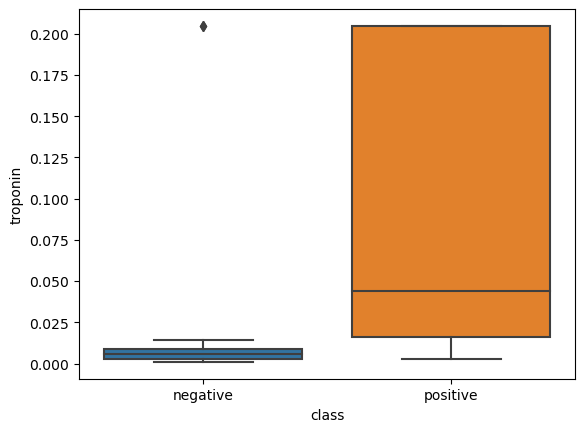

In [30]:
# Eliminate outliers in df using interquartile range method
# 1. Find the first quartile (Q1) and third quartile (Q3) of df
# 2. Compute the interquartile range (IQR = Q3 - Q1)
# 3. Compute the lower and upper bounds (LB = Q1 - 1.5*IQR and UB = Q3 + 1.5*IQR)
# 4. Clip the rows in df that are outside the bounds (LB, UB)

for column in [i for i in df if df[i].dtype != 'object']:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - 1.5*iqr
    ub = q3 + 1.5*iqr
    df[column] = df[column].clip(lb, ub)

# Code for boxplots to inspect outliers after clipping
for column in df:
    if column != 'class':
        sns.boxplot(x='class', y=column, data=df)
        plt.show()


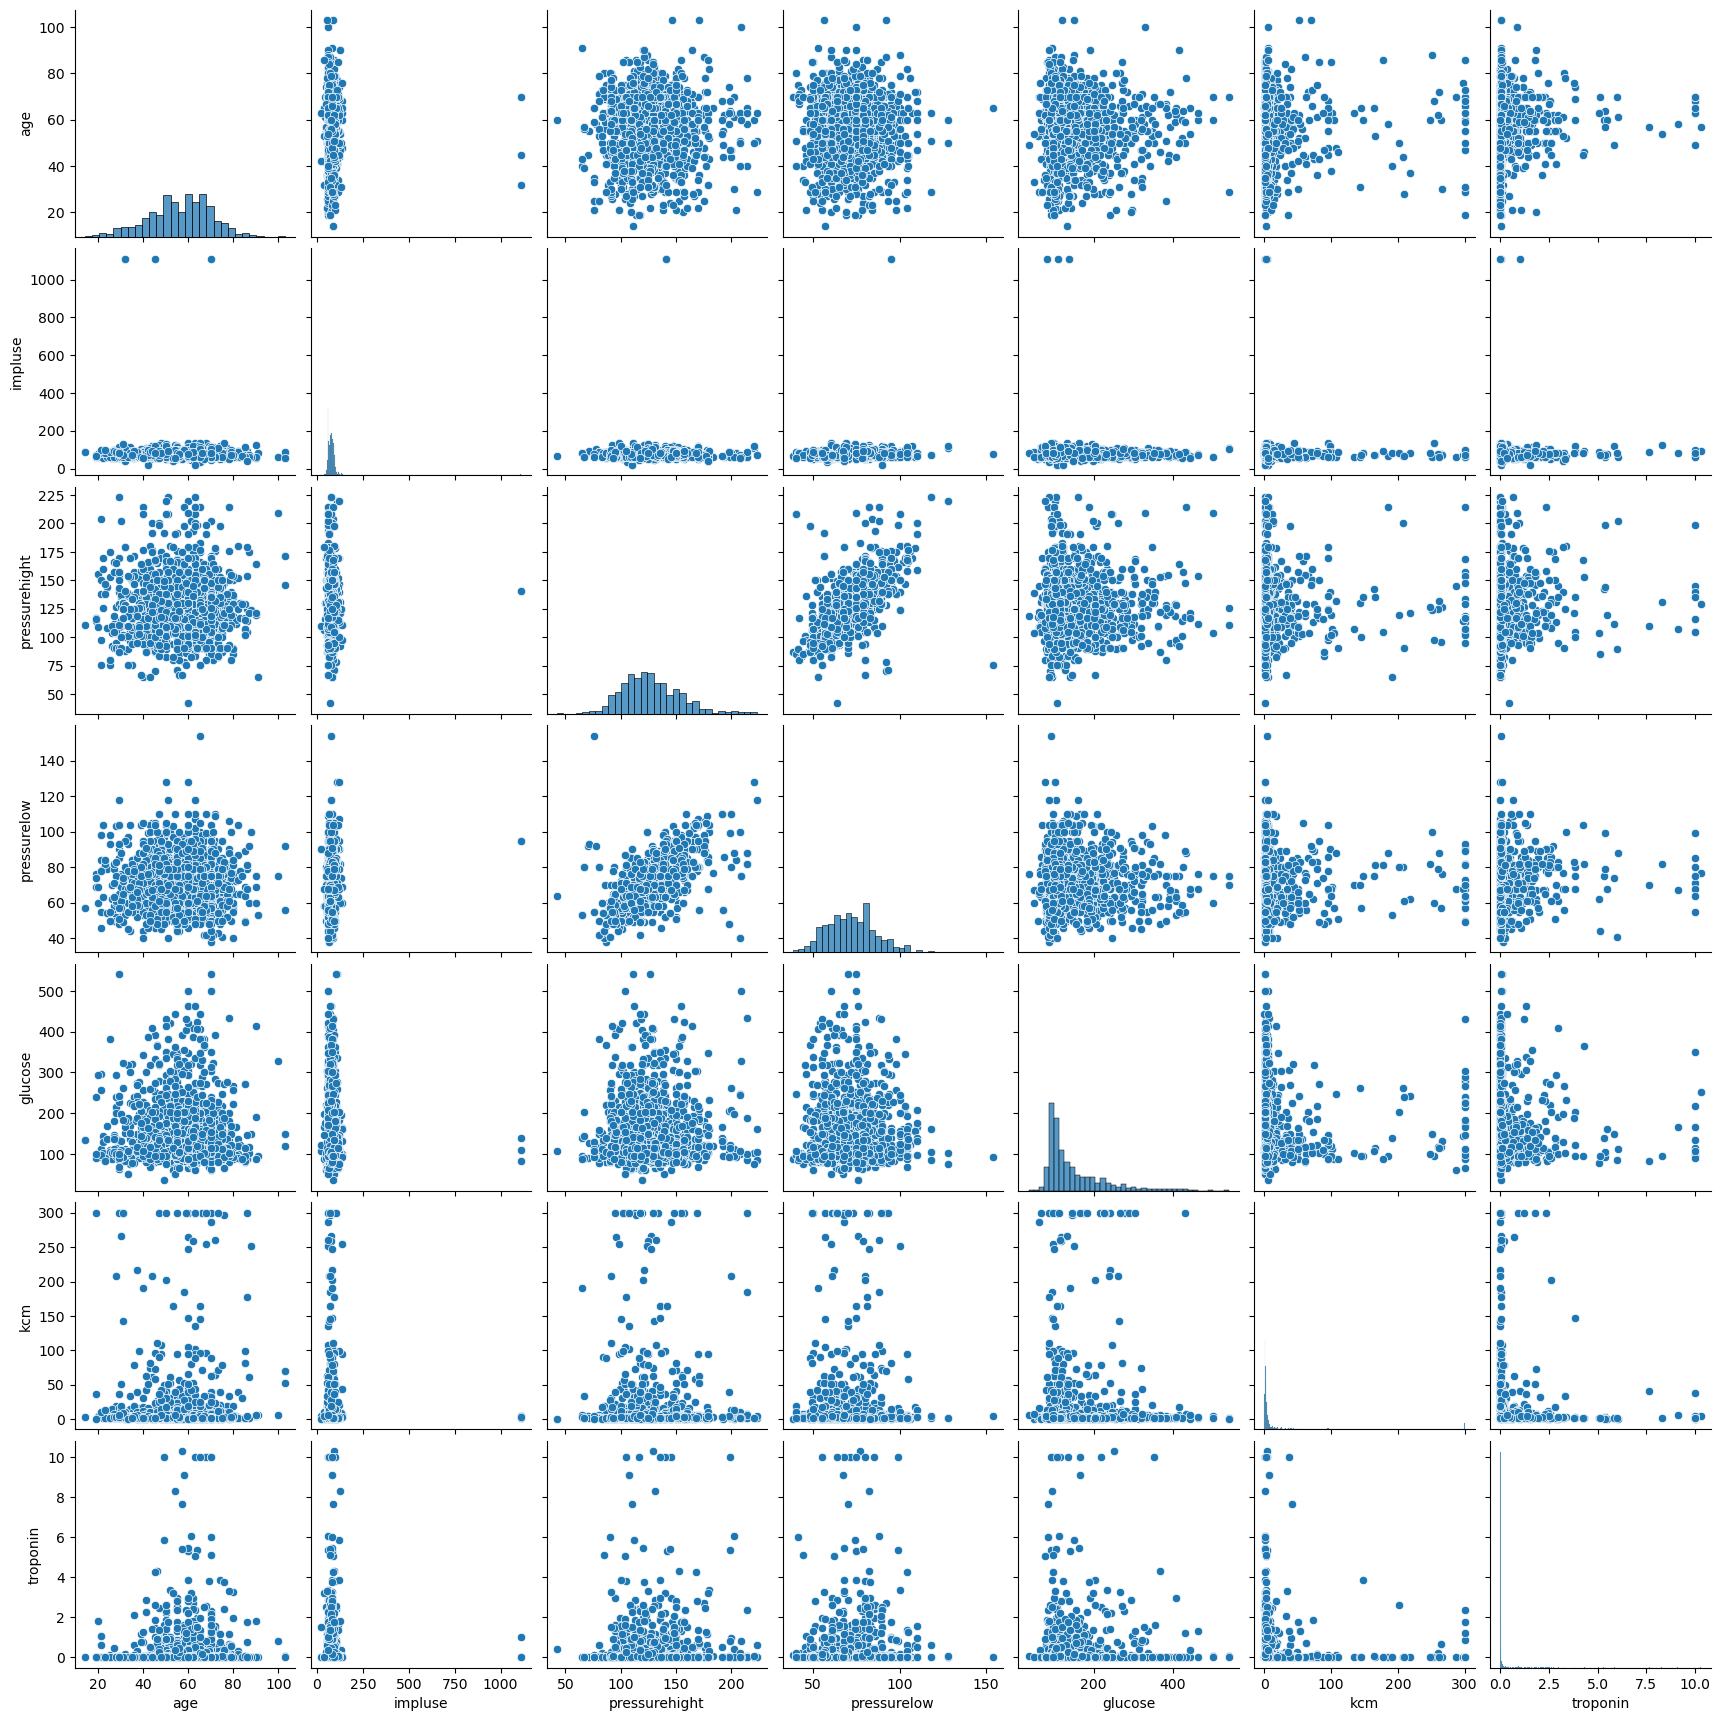

In [23]:
# Visualize relationships between features and the target variable (class) using scatterplots, histograms, boxplots, pairplots
# and heatmaps

sns.pairplot(data=df, dropna=True, x_vars=[i for i in df if i not in ['class', 'gender']], y_vars=[i for i in df if i not in ['class', 'gender']])
plt.show()